# Basic Linear Classifier Understanding

*The goal is to understand how the simple linear classifier ML function works.  We are **NOT** building a ML model here.  We purposefully choose (provide random values with seed 1) our Weight Matrix and Bias Vector values as a learning exercise.*

**y = Wx+b**

Where:

The entire function is called the "scoring" function, and the goal is to output a predicted label of some input data point.

* **xi** = a single input data point
* **yi** = the predicted label or xi
* **W** = the weights matrix
* **b** = the bias matrix

## Steps

1. Initialize Labels vector
2. Initialize Weights Matrix
3. Initialize Bias vector
4. Load image
5. Resize image
6. Flatten image
7. Run scoring function

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [24]:
# 1. Initialize Labels Vector - Image classifier Cat, Dog, or Panda
# We seed the random number generator which just gives us the same "random" numbers each time
# This just allows for the current "non-learning" example to work

labels = ['dog','cat','panda']
np.random.seed(1)

In [25]:
# 2. Initialize the Weights Matrix - Input will be a 32px x 32px RGB image (32 x 32 x 3 = 3072 features)
#    Therefore the Weights Matrix needs to have 3 rows (# of labels) x 3072 columns [# of features]
#    randn() takes dimensional arguments and returns norally distributed numbers around a mean 0 and variance of 1
#    (mean 0 and variance of +-1)

W = np.random.randn(3,3072)
print(W.shape)
print(W)

(3, 3072)
[[ 1.62434536 -0.61175641 -0.52817175 ...  1.20731703  1.37766662
   0.63628393]
 [ 0.05529735  0.40581712  1.24845728 ... -1.95176055  0.21272915
   0.10822446]
 [ 0.13130697 -1.36381382  0.23921477 ... -0.67836182 -1.13521117
   0.05031758]]


In [26]:
# 3. Initialize the Bias Vector - Input will be a vector (single column matrix) with rows equal to the number 
#    of labels

b = np.random.randn(3)
print(b.shape)
print(b)

(3,)
[-0.72996827 -0.37260481  0.9461125 ]


In [27]:
# 4.  Load image

orig_img = cv2.imread('images/beagle.png')
print(orig_img.shape)

(336, 500, 3)


In [28]:
# 5. Resize image to be 32x32px
#    (Could combine with flatten for single line, but showing seperate for beginner sake)

img = cv2.resize(orig_img,(32,32))
print(img.shape)

(32, 32, 3)


In [29]:
# 6. Flatten Image (create single column vector with 3072 rows)

img = img.flatten()
print(img.shape)

(3072,)


In [30]:
# 7. Run scoring function

scores = W.dot(img)+b
print(scores.shape)
print(scores)

(3,)
[ 7963.92759169 -2930.99452794  3362.47036823]


In [31]:
# 8.  Loop through scores and labels and print results.  Zip is a built-in python function that basically creates
#     tuples composed of the i'th element of the 1st argument and the i'th element of the 2nd argument 
#     (ABC,XYZ)--> (A,X),(B,Y),... Each loop we print the label paired with the score

# "label" and "score" take advanctage of Python "tuple unpacking".
# a,b = (2,4)
# a > 2
# b > 4

for(label,score) in zip(labels,scores):
    print("[INFO] {}: {:.2F}".format(label,score))

[INFO] dog: 7963.93
[INFO] cat: -2930.99
[INFO] panda: 3362.47


In [32]:
# 9. Draw label with highest score on the image.  Arguments are as follows:
#    putText(image, text, origin of text, font type, font scale, color, line thickness)

#    np.argmax() returns the index of the largest value in the array.  The index runs the entire array.
#    For example, if the array were ([1,2,3],[4,5,6],[7,8,9]) argmax() would return 8, designating the largest
#    "9" is in the index "8".

cv2.putText(orig_img,"Label: {}".format(labels[np.argmax(scores)]),
            (10,30),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0, 255, 0), 2)

array([[[ 63, 120, 166],
        [ 61, 119, 164],
        [ 59, 116, 162],
        ...,
        [237, 242, 231],
        [234, 239, 228],
        [241, 244, 235]],

       [[ 59, 118, 164],
        [ 62, 119, 165],
        [ 62, 120, 165],
        ...,
        [232, 236, 225],
        [244, 247, 238],
        [241, 244, 235]],

       [[ 58, 117, 163],
        [ 60, 116, 163],
        [ 62, 117, 165],
        ...,
        [245, 249, 239],
        [249, 253, 243],
        [246, 251, 241]],

       ...,

       [[105, 186, 237],
        [103, 186, 234],
        [103, 184, 234],
        ...,
        [ 34,  66,  85],
        [ 35,  67,  86],
        [ 34,  67,  85]],

       [[104, 183, 235],
        [104, 185, 236],
        [104, 186, 236],
        ...,
        [ 38,  70,  89],
        [ 38,  70,  89],
        [ 37,  69,  88]],

       [[104, 182, 235],
        [102, 182, 234],
        [104, 185, 235],
        ...,
        [ 42,  74,  91],
        [ 40,  72,  91],
        [ 37,  68,  88]]

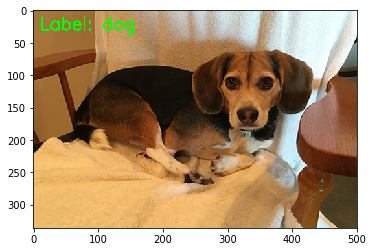

In [13]:
# 10. Display image with label.  Using OpenCV .imshow() freezes jupyter notebook, so must use matplotlib.

#cv2.imshow("Image",orig_img)
#cv2.waitKey(20000)
#Import image

#Show the image with matplotlib
orig_img = cv2.cvtColor(orig_img,cv2.COLOR_BGR2RGB)
plt.imshow(orig_img,)
plt.show()